# Stock Market Prediction using Numerical and Textual Analysis

## Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

**Komal Joshi**

### Importing Required Packages

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textblob
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import scipy.stats as stats

#### Import the News Headlines Dataset

In [2]:
news_data = pd.read_csv('News.csv')

In [3]:
news_data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


### Data Pre-processing and EDA of News Dataset

In [4]:
news_data['published_date'] = np.array([str(str(str(x)[:4]) + '/' + str(str(x)[4:6]) + '/' + str(str(x)[6:])) for x in news_data['publish_date']])

In [5]:
news_data.head()

,publish_date,headline_category,headline_text,published_date
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,2001/01/01
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
2,20010102,unknown,Fissures in Hurriyat over Pak visit,2001/01/02
3,20010102,unknown,America's unwanted heading for India?,2001/01/02
4,20010102,unknown,For bigwigs; it is destination Goa,2001/01/02


In [6]:
news_data = news_data.drop('publish_date', axis=1)

In [7]:
news_data.head()

,headline_category,headline_text,published_date
0,sports.wwe,win over cena satisfying but defeating underta...,2001/01/01
1,unknown,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
2,unknown,Fissures in Hurriyat over Pak visit,2001/01/02
3,unknown,America's unwanted heading for India?,2001/01/02
4,unknown,For bigwigs; it is destination Goa,2001/01/02


In [8]:
news_data['published_date'] = pd.to_datetime(news_data['published_date'])

In [9]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
headline_category    object
headline_text        object
published_date       datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 75.5+ MB


In [10]:
news_data = news_data[['published_date', 'headline_text']]

In [11]:
news_data.columns = ['published_date', 'headline']

In [12]:
news_data.head()

,published_date,headline
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


#### Accumulating the headlines having same dates.

In [14]:
dict_news = {}

In [15]:
temp = news_data.loc[0, 'published_date']
temp2 = str(news_data.loc[0, 'headline'])
for x in range(1, len(news_data)):
    if news_data.loc[x, 'published_date']==temp:
        temp2 += '. ' + str(news_data.loc[x, 'headline'])
    else:
        dict_news[news_data.loc[x-1, 'published_date']] = temp2
        temp2 = ""
        temp = news_data.loc[x, 'published_date']

In [16]:
len(dict_news)

7079

In [17]:
indexes = np.arange(0, len(dict_news))

In [18]:
df_news = pd.DataFrame(indexes)

In [19]:
df_news.head()

,0
0,0
1,1
2,2
3,3
4,4


In [20]:
df_news['Published_Date'] = dict_news.keys()

In [21]:
df_news.head()

,0,Published_Date
0,0,2001-01-01
1,1,2001-01-02
2,2,2001-01-03
3,3,2001-01-04
4,4,2001-01-05


In [22]:
l = []
for i in dict_news.keys():
    l.append(dict_news[i])

In [23]:
l[0]

'win over cena satisfying but defeating undertaker bigger roman reigns'

In [24]:
df_news['Headline'] = np.array(l)

In [25]:
df_news.head()

,0,Published_Date,Headline
0,0,2001-01-01,win over cena satisfying but defeating underta...
1,1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...
2,2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...
3,3,2001-01-04,. Vajpayee gives big push to tech education; R...
4,4,2001-01-05,. Hawkings' day out. Light combat craft takes ...


In [26]:
df_news = df_news.drop(0, axis=1)

### Performing Sentiment Analysis on News Dataset

In [27]:
polarity = []
subjectivity = []
tuples = []
for i in df_news['Headline'].values:
    my_valence = TextBlob(i)
    tuples.append(my_valence.sentiment)

In [28]:
for i in tuples:
    polarity.append(i[0])
    subjectivity.append(i[1])

In [29]:
df_news['Polarity'] = np.array(polarity)
df_news['Subjectivity'] = np.array(subjectivity)

In [30]:
df_news.head()

,Published_Date,Headline,Polarity,Subjectivity
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636
3,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984


In [31]:
temp = ['Positive', 'Negative', 'Neutral']
temp1 = ['Factual', 'Public']
polarity = []
subjectivity = []
for i in range(len(df_news)):
    pol = df_news.iloc[i]['Polarity']
    sub = df_news.iloc[i]['Subjectivity']
    if pol>=0:
        if pol>=0.2:
            polarity.append(temp[0])
        else:
            polarity.append(temp[2])
    else:
        if pol<=-0.2:
            polarity.append(temp[1])
        else:
            polarity.append(temp[2])
    
    if sub>=0.4:
        subjectivity.append(temp1[1])
    else:
        subjectivity.append(temp1[0])

In [32]:
df_news['Sentiment'] = polarity
df_news['Opinion'] = subjectivity

In [33]:
df_news.head()

,Published_Date,Headline,Polarity,Subjectivity,Sentiment,Opinion
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,Positive,Public
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333,Neutral,Factual
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual
3,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public


In [34]:
len(df_news)

7079

#### Let's have a look at how Sentiments and Opinions are distributed

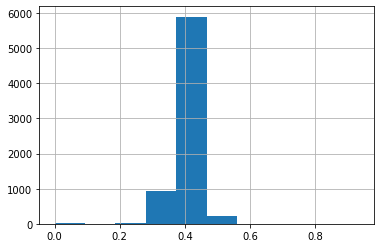

In [35]:
plt.figure(figsize=(6,4))
df_news['Subjectivity'].hist()
plt.show()

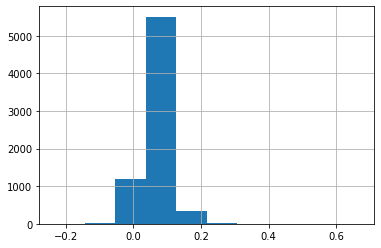

In [36]:
plt.figure(figsize=(6,4))
df_news['Polarity'].hist()
plt.show()

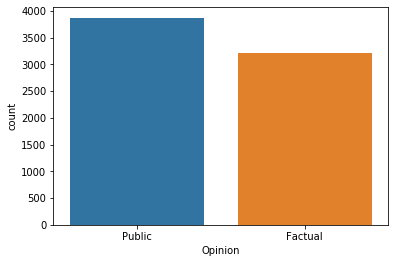

In [37]:
sns.countplot(df_news['Opinion'])

## Stocks Data: Pre-processing and EDA

In [38]:
stocks = pd.read_csv('Stocks.csv')

In [39]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-20,2984.75,2991.00,2983.75,2990.25,2990.25,1093450.0
1,2019-10-21,2984.75,3007.50,2983.75,3006.50,3006.50,886557.0
2,2019-10-22,3006.50,3014.25,2988.25,2994.50,2994.50,1125601.0
3,2019-10-23,2992.00,3006.00,2982.00,3005.75,3005.75,1055958.0
4,2019-10-24,3006.00,3015.25,2998.75,3004.25,3004.25,1061278.0


In [40]:
len(stocks)

305

In [41]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 7 columns):
Date         305 non-null object
Open         295 non-null float64
High         295 non-null float64
Low          295 non-null float64
Close        295 non-null float64
Adj Close    295 non-null float64
Volume       295 non-null float64
dtypes: float64(6), object(1)
memory usage: 16.8+ KB


In [42]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,295.000000,295.000000,295.000000,295.000000,295.000000,2.950000e+02
mean,3110.983051,3142.217017,3080.672034,3115.013593,3115.013593,1.767054e+06
std,261.102167,242.957545,274.387133,258.150005,258.150005,9.532702e+05
min,2220.250000,2229.000000,2174.000000,2203.250000,2203.250000,6.439100e+04
25%,2992.375000,3022.875000,2974.750000,3003.500000,3003.500000,1.225104e+06
50%,3146.250000,3177.250000,3125.500000,3146.750000,3146.750000,1.567224e+06
75%,3300.500000,3318.875000,3279.125000,3299.375000,3299.375000,2.083052e+06
max,3578.750000,3587.000000,3526.250000,3579.250000,3579.250000,6.659472e+06


In [43]:
stocks['HL_pct']=((stocks['High']-stocks['Low'])/stocks['Low'])*100
stocks['PCT_change']=((stocks['Close']-stocks['Open'])/stocks['Open'])*100

In [44]:
stocks = stocks.drop(['Open','High','Close','Low'], axis=1)

In [45]:
stocks.head()

,Date,Adj Close,Volume,HL_pct,PCT_change
0,2019-10-20,2990.25,1093450.0,0.242983,0.184270
1,2019-10-21,3006.50,886557.0,0.795978,0.728704
2,2019-10-22,2994.50,1125601.0,0.870074,-0.399135
3,2019-10-23,3005.75,1055958.0,0.804829,0.459559
4,2019-10-24,3004.25,1061278.0,0.550229,-0.058217


In [46]:
stocks['Date'] = pd.to_datetime(stocks['Date'])

In [47]:
stocks.head()

,Date,Adj Close,Volume,HL_pct,PCT_change
0,2019-10-20,2990.25,1093450.0,0.242983,0.184270
1,2019-10-21,3006.50,886557.0,0.795978,0.728704
2,2019-10-22,2994.50,1125601.0,0.870074,-0.399135
3,2019-10-23,3005.75,1055958.0,0.804829,0.459559
4,2019-10-24,3004.25,1061278.0,0.550229,-0.058217


In [48]:
df_news.columns = ['Date', 'Headline', 'Polarity', 'Subjectivity', 'Sentiment', 'Opinion']

### Merging the News and Stocks Datasets on the basis of Dates

In [49]:
merge_data = df_news.merge(stocks, how='inner', on='Date', left_index = True)

In [50]:
merge_data.head()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,2019-10-20,. Makeup Removers: Make it a habit for a healt...,0.052337,0.388658,Neutral,Factual,2990.25,1093450.0,0.242983,0.184270
1,2019-10-21,. from kalki koechlin to amy jackson and karee...,0.066256,0.385804,Neutral,Factual,3006.50,886557.0,0.795978,0.728704
2,2019-10-22,. When I compose a song; I don't think whether...,0.044899,0.403248,Neutral,Public,2994.50,1125601.0,0.870074,-0.399135
3,2019-10-23,. Need fitness motivation? You have to attend ...,0.053053,0.400712,Neutral,Public,3005.75,1055958.0,0.804829,0.459559
4,2019-10-24,. Now; recognition by Punjab government must f...,0.078351,0.437144,Neutral,Public,3004.25,1061278.0,0.550229,-0.058217


In [51]:
merge_data = merge_data.reset_index()

In [52]:
merge_data.head()

,index,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,0,2019-10-20,. Makeup Removers: Make it a habit for a healt...,0.052337,0.388658,Neutral,Factual,2990.25,1093450.0,0.242983,0.184270
1,1,2019-10-21,. from kalki koechlin to amy jackson and karee...,0.066256,0.385804,Neutral,Factual,3006.50,886557.0,0.795978,0.728704
2,2,2019-10-22,. When I compose a song; I don't think whether...,0.044899,0.403248,Neutral,Public,2994.50,1125601.0,0.870074,-0.399135
3,3,2019-10-23,. Need fitness motivation? You have to attend ...,0.053053,0.400712,Neutral,Public,3005.75,1055958.0,0.804829,0.459559
4,4,2019-10-24,. Now; recognition by Punjab government must f...,0.078351,0.437144,Neutral,Public,3004.25,1061278.0,0.550229,-0.058217


In [53]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 11 columns):
index           211 non-null int64
Date            211 non-null datetime64[ns]
Headline        211 non-null object
Polarity        211 non-null float64
Subjectivity    211 non-null float64
Sentiment       211 non-null object
Opinion         211 non-null object
Adj Close       208 non-null float64
Volume          208 non-null float64
HL_pct          208 non-null float64
PCT_change      208 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 18.3+ KB


In [54]:

merge_data = merge_data.drop(0)

In [55]:
merge_data = merge_data[merge_data['Adj Close'].notna()]

In [56]:

merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 1 to 210
Data columns (total 11 columns):
index           207 non-null int64
Date            207 non-null datetime64[ns]
Headline        207 non-null object
Polarity        207 non-null float64
Subjectivity    207 non-null float64
Sentiment       207 non-null object
Opinion         207 non-null object
Adj Close       207 non-null float64
Volume          207 non-null float64
HL_pct          207 non-null float64
PCT_change      207 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 19.4+ KB


In [57]:
merge_data = merge_data.reset_index()
merge_data.head()

,level_0,index,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,1,1,2019-10-21,. from kalki koechlin to amy jackson and karee...,0.066256,0.385804,Neutral,Factual,3006.50,886557.0,0.795978,0.728704
1,2,2,2019-10-22,. When I compose a song; I don't think whether...,0.044899,0.403248,Neutral,Public,2994.50,1125601.0,0.870074,-0.399135
2,3,3,2019-10-23,. Need fitness motivation? You have to attend ...,0.053053,0.400712,Neutral,Public,3005.75,1055958.0,0.804829,0.459559
3,4,4,2019-10-24,. Now; recognition by Punjab government must f...,0.078351,0.437144,Neutral,Public,3004.25,1061278.0,0.550229,-0.058217
4,5,5,2019-10-25,. Dhanteras 2019: Date; time; puja vidhi; shub...,0.068307,0.387471,Neutral,Factual,3020.25,1098391.0,0.883333,0.549313


In [58]:
merge_data = merge_data.drop(['level_0', 'index'], axis=1)
merge_data.head()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,2019-10-21,. from kalki koechlin to amy jackson and karee...,0.066256,0.385804,Neutral,Factual,3006.50,886557.0,0.795978,0.728704
1,2019-10-22,. When I compose a song; I don't think whether...,0.044899,0.403248,Neutral,Public,2994.50,1125601.0,0.870074,-0.399135
2,2019-10-23,. Need fitness motivation? You have to attend ...,0.053053,0.400712,Neutral,Public,3005.75,1055958.0,0.804829,0.459559
3,2019-10-24,. Now; recognition by Punjab government must f...,0.078351,0.437144,Neutral,Public,3004.25,1061278.0,0.550229,-0.058217
4,2019-10-25,. Dhanteras 2019: Date; time; puja vidhi; shub...,0.068307,0.387471,Neutral,Factual,3020.25,1098391.0,0.883333,0.549313


### Considering only required columns of the merged Dataset

In [59]:


df_needed = merge_data[['Date', 'Polarity', 'Subjectivity','Adj Close','HL_pct','PCT_change']]
df_needed.head()

,Date,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
0,2019-10-21,0.066256,0.385804,3006.50,0.795978,0.728704
1,2019-10-22,0.044899,0.403248,2994.50,0.870074,-0.399135
2,2019-10-23,0.053053,0.400712,3005.75,0.804829,0.459559
3,2019-10-24,0.078351,0.437144,3004.25,0.550229,-0.058217
4,2019-10-25,0.068307,0.387471,3020.25,0.883333,0.549313


In [60]:
df_needed = df_needed.set_index('Date')

In [61]:
df_needed.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,,
2019-10-21,0.066256,0.385804,3006.50,0.795978,0.728704
2019-10-22,0.044899,0.403248,2994.50,0.870074,-0.399135
2019-10-23,0.053053,0.400712,3005.75,0.804829,0.459559
2019-10-24,0.078351,0.437144,3004.25,0.550229,-0.058217
2019-10-25,0.068307,0.387471,3020.25,0.883333,0.549313


### Scaling the data using MinMaxScaler to develop a model based on it.

In [62]:
scaler = MinMaxScaler()
new = pd.DataFrame(scaler.fit_transform(df_needed))
new.columns = df_needed.columns
new.index=df_needed.index
new.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,,
2019-10-21,0.515255,0.358985,0.678134,0.053104,0.507520
2019-10-22,0.325146,0.504190,0.668003,0.058595,0.453282
2019-10-23,0.397734,0.483084,0.677501,0.053760,0.494577
2019-10-24,0.622928,0.786341,0.676235,0.034890,0.469677
2019-10-25,0.533515,0.372858,0.689743,0.059578,0.498893


In [63]:
trainSet = new[: int(0.7*(len(new)))]
testSet = new[int(0.7*(len(new))):]

In [64]:
model = VAR(endog = trainSet)
fit = model.fit()

C:\Users\Komal-ssd\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### Predicted vs Test Set

In [65]:
pred = fit.forecast(fit.y, steps=len(testSet))
predicted = pd.DataFrame(pred, columns=new.columns)

C:\Users\Komal-ssd\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [66]:
predicted.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
0,0.426673,0.485528,0.515511,0.291317,0.536695
1,0.447732,0.475735,0.511616,0.289275,0.483832
2,0.436335,0.467577,0.516742,0.297119,0.497501
3,0.437203,0.464893,0.518669,0.299758,0.492852
4,0.435310,0.462484,0.521050,0.302001,0.493555


In [67]:
testSet.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,,
2020-04-16,0.691883,0.600080,0.493246,0.224874,0.506793
2020-04-17,0.465852,0.520604,0.562896,0.162253,0.484235
2020-04-19,0.349143,0.517959,0.543900,0.020829,0.473321
2020-04-20,0.625916,0.512154,0.509287,0.182419,0.380043
2020-04-21,0.614604,0.371802,0.446391,0.310506,0.343983


### Check the accuracy

In [68]:
np.sqrt(mean_squared_error(predicted['Adj Close'], testSet['Adj Close']))

0.13147195256100908

C:\Users\Komal-ssd\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


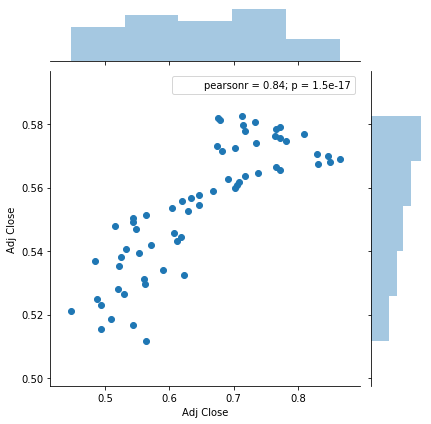

In [69]:
sns.jointplot(testSet['Adj Close'], predicted['Adj Close']).annotate(stats.pearsonr)
plt.show()